In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean, std
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/user/Downloads/DenguePrediction'
train1 = pd.read_csv(path +'/dengue_features_train.csv') 
test = pd.read_csv(path +'/dengue_features_test.csv')
label = pd.read_csv(path +'/dengue_labels_train.csv') 

In [6]:
train= train1.merge(label , on = "weekofyear", how ="inner")

In [15]:
def impute_checker (feature, imputed_dataset, title):
  train[feature].plot(kind='kde', c='black')
  imputed_dataset[feature].plot(kind='kde', style = "--", c= '#66c2a5')
  labels = ['Original df', 'Imputed df']
  plt.legend(labels)
  plt.xlabel(feature)
  plt.title(title)
  plt.show()

In [7]:
column = ["week_start_date"]

for col in column:
     train[col] = pd.to_datetime(train[col])
     test[col] = pd.to_datetime(test[col])

train["month"] = train["week_start_date"].dt.month
train["day"] = train["week_start_date"].dt.day

test["month"] = test["week_start_date"].dt.month
test["day"] = test["week_start_date"].dt.day

In [8]:
train.head(2)

,city_x,year_x,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_y,year_y,total_cases,month,day
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.9,29.4,20.0,16.0,sj,1990,4,4,30
1,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.9,29.4,20.0,16.0,sj,1991,17,4,30


In [10]:
columns = ["city_x","year_x","week_start_date"]
for col in columns:
     train.drop(col, axis=1,inplace = True)

In [11]:
train.rename(columns={"city_y": "city"}, inplace=True)
train.rename(columns={"year_y": "year"}, inplace=True)

In [12]:
train.head(2)

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,total_cases,month,day
0,18,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,25.442857,6.9,29.4,20.0,16.0,sj,1990,4,4,30
1,18,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,25.442857,6.9,29.4,20.0,16.0,sj,1991,17,4,30


In [16]:
test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [21]:
numerical_col = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm',
                 'reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
                 'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
                 'reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm',
                 'reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c',
                 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c','station_precip_mm']

In [19]:
mean_train = train.copy()
mean_test = test.copy()

In [22]:
for col in numerical_col:
     mean_train[col] = mean_train[col].fillna(mean_train[col].mean())
     mean_test[col] = mean_test[col].fillna(mean_test[col].mean())

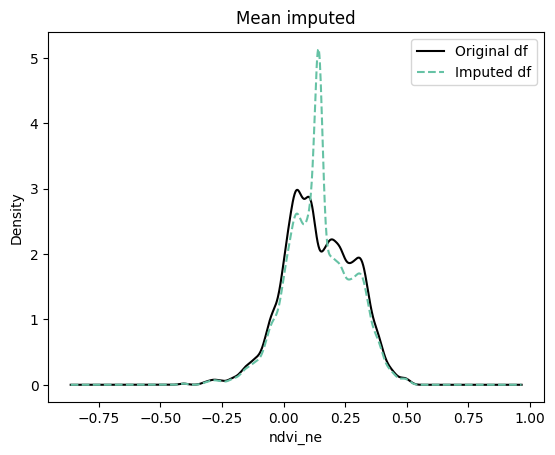

In [23]:
impute_checker("ndvi_ne", mean_train, 'Mean imputed')

In [13]:
X = train.drop(["total_cases"],axis=1)
y = train["total_cases"] 

In [14]:
X.shape

(1146496, 25)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,random_state=42)

In [19]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

In [20]:
n_splits = 5
kfold = KFold(n_splits=n_splits,shuffle=True,random_state=42)

In [23]:
'''
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0]}

gb = GradientBoostingRegressor()
randomsearch =RandomizedSearchCV(gb,param_grid,cv=kfold, scoring='neg_mean_absolute_error')
randomsearch.fit(X_train,y_train)
print("Best parameters for XGBoost:", randomsearch.best_params_)
'''

In [ ]:
'''
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]}

xg = XGBRegressor()
randomsearch =RandomizedSearchCV(gb,param_grid,cv=kfold, scoring='neg_mean_absolute_error')
randomsearch.fit(X_train,y_train)
print("Best parameters for XGBoost:", randomsearch.best_params_)
'''

In [18]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAErf : {mae:.4f}")

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAEgb : {mae:.4f}")

xg = XGBRegressor(random_state=42)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAExg : {mae:.4f}")

lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAElr : {mae:.4f}")

dt =DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAEdt : {mae:.4f}")

MAErf : 23.3051
MAEgb : 23.2717
MAExg : 23.3024
MAElr : 23.2646
MAEdt : 23.3038


In [ ]:
'''
k = 14
selector = SelectKBest(score_func = f_classif,k=k)
X_train_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)
processed_test_selected = selector.transform(processed_test)
'''